In [1]:
import pandas as pd
import itertools
import numpy as np
from scipy import stats
from scipy.stats import ttest_ind
import matplotlib.pyplot as plt
import seaborn
%matplotlib inline

In [2]:
buildings_all = pd.read_csv("original_data/PublicLEEDProjectDirectory.csv", skiprows=3, encoding="ISO-8859-1")
buildings_all = buildings_all[buildings_all['Isconfidential'] == 'No']
buildings_2009 = buildings_all[buildings_all["LEEDSystemVersionDisplayName"] == "LEED-NC v2009"] 

/Users/trippshealy/Gdrive/research/leed_countries/.direnv/python-3.4.3/lib/python3.4/site-packages/pandas/io/parsers.py:1170: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  data = self._reader.read(nrows)


In [3]:
def my_filter_2009(df):
    countries = df.dropna(subset = ['PointsAchieved'])
    countries['PointsAchieved'] = countries['PointsAchieved'].convert_objects(convert_numeric=True)
    countries = countries[countries['PointsAchieved'] > 39]
    return(countries)

In [4]:
filtered = my_filter_2009(buildings_2009)

/Users/trippshealy/Gdrive/research/leed_countries/.direnv/python-3.4.3/lib/python3.4/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [5]:
turkey = filtered[filtered['Country'] == 'TR']
usa = filtered[filtered['Country'] == 'US']
china = filtered[filtered['Country'] == 'CN']
brazil = filtered[filtered['Country'] == 'BR']

In [6]:
def filter_owner(df):
    return(df[df["OwnerTypes"] == 'Corporate: Privately Held'])

In [7]:
turkey_private = filter_owner(turkey)
usa_private = filter_owner(usa)
china_private = filter_owner(china)
brazil_private = filter_owner(brazil)

In [8]:
def categorizer(df):
    cert = []
    silver = []
    gold = []
    platinum = []
    for i in df.PointsAchieved:
        if i <=49:
            cert.append(i)
        elif i >=50 and i <=59:
            silver.append(i)
        elif i >=60 and i <=79:
            gold.append(i)
        elif i >= 80:
            platinum.append(i)
        else: raise ValueError('Something wrong happened')
    total = len(cert) + len(silver) + len(gold) + len(platinum)
    cat_dict = {"total": total, 
                "cert%": len(cert)/total*100, 
                "silver%": len(silver)/total*100, 
                "gold%": len(gold)/total*100, 
                "platinum%": len(platinum)/total*100}
    return(cat_dict)
#     return(total)

In [9]:
turkey_dict = categorizer(turkey_private)
usa_dict = categorizer(usa_private)
china_dict = categorizer(china_private)
brazil_dict = categorizer(brazil_private)

print("{}\n {}".format('Turkey', turkey_dict))
print("{}\n {}".format('USA', usa_dict))
print("{}\n {}".format('China', china_dict))
print("{}\n {}".format('Brazil', brazil_dict))

Turkey
 {'gold%': 63.33333333333333, 'silver%': 16.666666666666664, 'total': 30, 'platinum%': 10.0, 'cert%': 10.0}
USA
 {'gold%': 23.64864864864865, 'silver%': 35.810810810810814, 'total': 592, 'platinum%': 4.5608108108108105, 'cert%': 35.97972972972973}
China
 {'gold%': 62.7906976744186, 'silver%': 18.6046511627907, 'total': 43, 'platinum%': 6.976744186046512, 'cert%': 11.627906976744185}
Brazil
 {'gold%': 44.0, 'silver%': 44.0, 'total': 25, 'platinum%': 0.0, 'cert%': 12.0}


In [10]:
turkey_dict['cert%'], china_dict['cert%'], usa_dict['cert%'], brazil_dict['cert%']

(10.0, 11.627906976744185, 35.97972972972973, 12.0)

In [11]:
turkey_freq = (turkey_dict['cert%'], turkey_dict['cert%'], usa_dict['cert%'], brazil_dict['cert%'])
china_freq = (turkey_dict['silver%'], china_dict['silver%'], usa_dict['silver%'], brazil_dict['silver%'])
usa_freq = (turkey_dict['gold%'], china_dict['gold%'], usa_dict['gold%'], brazil_dict['gold%'])
brazil_freq = (turkey_dict['platinum%'], china_dict['platinum%'], usa_dict['platinum%'], brazil_dict['platinum%'])

In [12]:
turkey_dict['cert%']

10.0

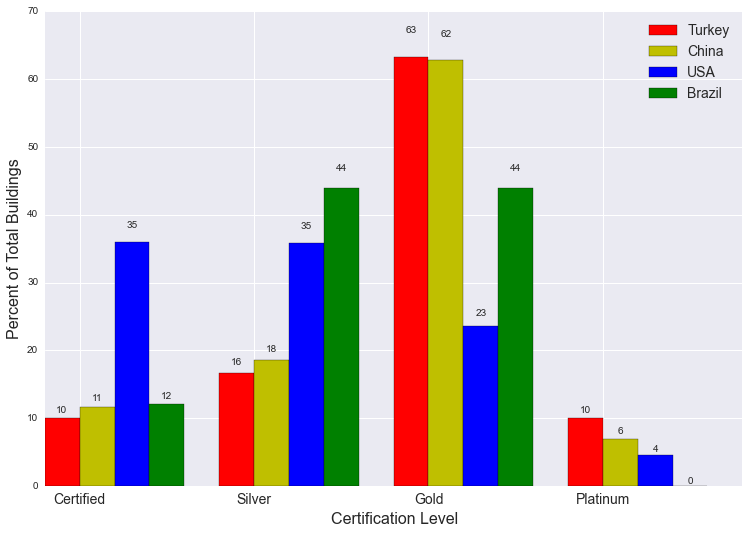

In [18]:
N = 4
#turkey, china, usa, brazil
turkey_freq = (turkey_dict['cert%'], turkey_dict['silver%'], turkey_dict['gold%'], turkey_dict['platinum%'])
china_freq = (china_dict['cert%'], china_dict['silver%'], china_dict['gold%'], china_dict['platinum%'])
usa_freq = (usa_dict['cert%'], usa_dict['silver%'], usa_dict['gold%'], usa_dict['platinum%'])
brazil_freq = (brazil_dict['cert%'], brazil_dict['silver%'], brazil_dict['gold%'], brazil_dict['platinum%'])


ind = np.arange(N)  # the x locations for the groups
width = 0.2       # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(ind, turkey_freq, width, color='r')
rects2 = ax.bar(ind+width, china_freq, width, color='y')
rects3 = ax.bar(ind+width+width, usa_freq, width, color='b')
rects4 = ax.bar(ind+width+width+width, brazil_freq, width, color='g')

# add some text for labels, title and axes ticks
ax.set_ylabel('Percent of Total Buildings', fontsize=16)
#ax.set_title('Percent of Buildings by Certification Level', fontsize=14)
ax.set_xticks(ind+width)
ax.set_xticklabels( ('Certified', 'Silver', 'Gold', 'Platinum'), fontsize=14 )

ax.legend( (rects1[0], rects2[0], rects3[0], rects4[0]), ('Turkey', 'China', 'USA', 'Brazil'), fontsize=14)

def autolabel(rects):
    # attach some text labels
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x()+rect.get_width()/2., 1.05*height, '%d'%int(height),
                ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)
autolabel(rects4)
fig.set_size_inches(12.5, 8.5),
plt.xlabel('Certification Level', fontsize=16),
fig.savefig('percent_cert_level.png', dpi=500)
plt.show()

## Histograms of points achieved

### Turkey

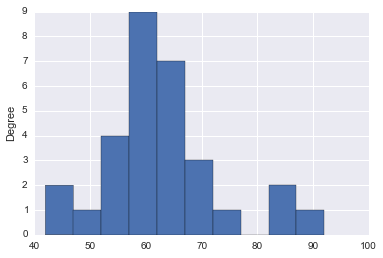

In [82]:
turkey_private.PointsAchieved.plot(kind='hist'); plt.ylabel=('Number of Buildings')

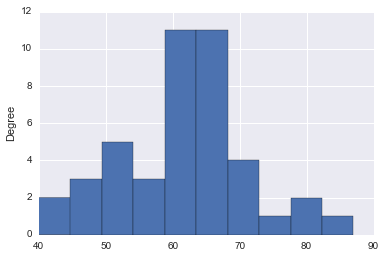

In [57]:
china_private.PointsAchieved.plot(kind='hist')

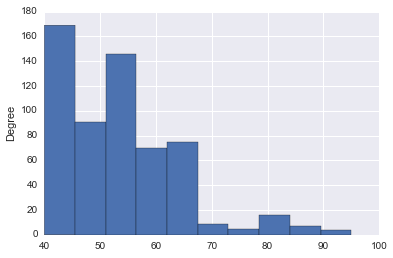

In [56]:
usa_private.PointsAchieved.plot(kind='hist')

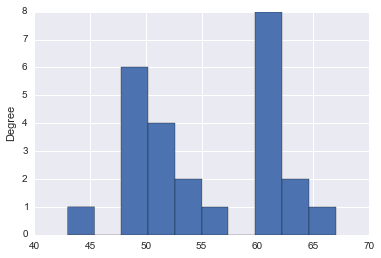

In [58]:
brazil_private.PointsAchieved.plot(kind='hist')

In [84]:
#'Turkey':turkey_private.PointsAchieved,'China':china_private.PointsAchieved, 'USA': usa_private.PointsAchieved, 'Brazil': brazil_private

In [94]:
brazil_private.PointsAchieved.tolist()

[64.0,
 53.0,
 62.0,
 50.0,
 43.0,
 60.0,
 56.0,
 67.0,
 50.0,
 50.0,
 60.0,
 60.0,
 60.0,
 49.0,
 54.0,
 52.0,
 50.0,
 51.0,
 51.0,
 49.0,
 63.0,
 51.0,
 61.0,
 62.0,
 60.0]

In [109]:
turkey_private.PointsAchieved.mean()

62.666666666666664

In [110]:
turkey_private.PointsAchieved.std()

10.911345987749081

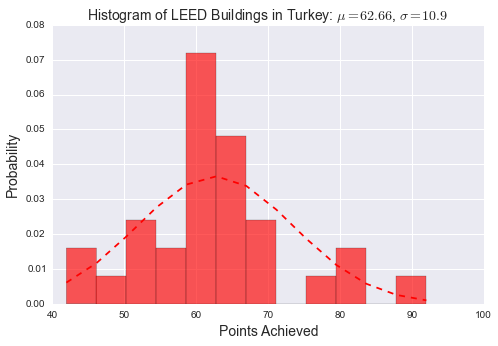

In [48]:
import matplotlib.mlab as mlab

mu = turkey_private.PointsAchieved.mean() # mean of distribution
sigma = turkey_private.PointsAchieved.std() # standard deviation of distribution
x = turkey_private.PointsAchieved.tolist()
fig = plt.figure(figsize=(8, 5), dpi=500)
num_bins = 12
# the histogram of the data
n, bins, patches = plt.hist(x, num_bins, normed=1, facecolor='red', alpha=0.65)
# add a 'best fit' line
y = mlab.normpdf(bins, mu, sigma)
plt.plot(bins, y, 'r--')
plt.xlabel('Points Achieved', fontsize=14)
plt.ylabel('Percent of Total Buildings', fontsize=14)
plt.ylabel('Probability', fontsize=14)
plt.title(r'Histogram of LEED Buildings in Turkey: $\mu=62.66$, $\sigma=10.9$',fontsize=14 )
# Tweak spacing to prevent clipping of ylabel
plt.subplots_adjust(left=0.15)
plt.savefig('turkey_private.png')
plt.show();
#fig.savefig('turkey_private.png', transparent=True, bbox_inches='tight', pad_inches=0)

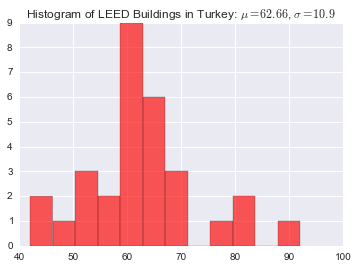

In [127]:
import matplotlib.mlab as mlab

mu = turkey_private.PointsAchieved.mean() # mean of distribution
# sigma = turkey_private.PointsAchieved.std() # standard deviation of distribution
x = turkey_private.PointsAchieved.tolist()

num_bins = 12
# the histogram of the data
n, bins, patches = plt.hist(x, num_bins, facecolor='red', alpha=0.65)
# add a 'best fit' line
# y = mlab.normpdf(bins, mu, sigma)
# plt.plot(bins, y, 'r--')
# plt.xlabel('Points Achieved')
# plt.ylabel('Probability')
plt.title(r'Histogram of LEED Buildings in Turkey: $\mu=62.66$, $\sigma=10.9$')

# Tweak spacing to prevent clipping of ylabel
plt.subplots_adjust(left=0.15)
plt.show()

In [112]:
china_private.PointsAchieved.mean()

62.069767441860463

In [113]:
china_private.PointsAchieved.std()

9.6495629035901498

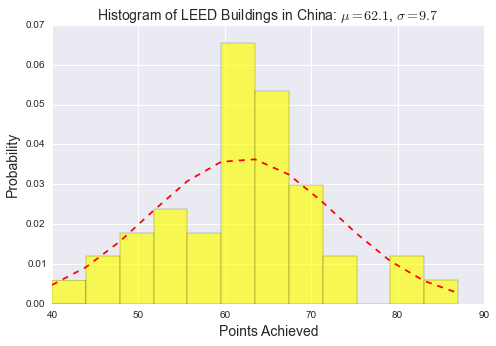

In [49]:
mu = china_private.PointsAchieved.mean() # mean of distribution
# sigma = china_private.PointsAchieved.std() # standard deviation of distribution
x = china_private.PointsAchieved.tolist()

fig = plt.figure(figsize=(8, 5), dpi=500)
num_bins = 12
# the histogram of the data
n, bins, patches = plt.hist(x, num_bins, normed=1, facecolor='yellow', alpha=0.65)
# add a 'best fit' line
y = mlab.normpdf(bins, mu, sigma)
plt.plot(bins, y, 'r--')
plt.xlabel('Points Achieved', fontsize=14)
plt.ylabel('Probability', fontsize=14)
plt.title(r'Histogram of LEED Buildings in China: $\mu=62.1$, $\sigma=9.7$', fontsize=14)

# Tweak spacing to prevent clipping of ylabel
plt.subplots_adjust(left=0.15)
plt.savefig('china_private.png')
plt.show()

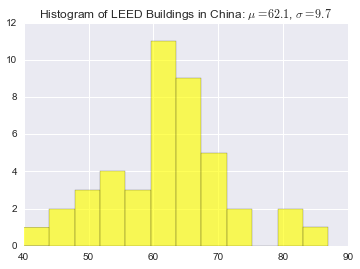

In [129]:
mu = china_private.PointsAchieved.mean() # mean of distribution
# sigma = china_private.PointsAchieved.std() # standard deviation of distribution
x = china_private.PointsAchieved.tolist()

num_bins = 12
# the histogram of the data
n, bins, patches = plt.hist(x, num_bins, facecolor='yellow', alpha=0.65)
# add a 'best fit' line
# y = mlab.normpdf(bins, mu, sigma)
# plt.plot(bins, y, 'r--')
# plt.xlabel('Points Achieved')
# plt.ylabel('Probability')
plt.title(r'Histogram of LEED Buildings in China: $\mu=62.1$, $\sigma=9.7$')

# Tweak spacing to prevent clipping of ylabel
plt.subplots_adjust(left=0.15)
plt.show()

In [116]:
usa_private.PointsAchieved.mean() # mean of distribution

53.197635135135137

In [118]:
usa_private.PointsAchieved.std()

10.578517698578358

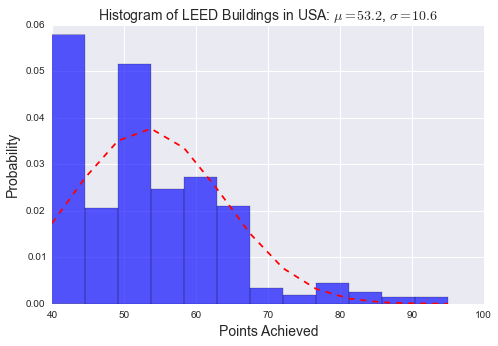

In [50]:
mu = usa_private.PointsAchieved.mean() # mean of distribution
sigma = usa_private.PointsAchieved.std() # standard deviation of distribution
x = usa_private.PointsAchieved.tolist()

fig = plt.figure(figsize=(8, 5), dpi=500)
num_bins = 12
# the histogram of the data
n, bins, patches = plt.hist(x, num_bins, normed=1, facecolor='blue', alpha=0.65)
# add a 'best fit' line
y = mlab.normpdf(bins, mu, sigma)
plt.plot(bins, y, 'r--')
plt.xlabel('Points Achieved', fontsize=14)
plt.ylabel('Probability', fontsize=14)
plt.title(r'Histogram of LEED Buildings in USA: $\mu=53.2$, $\sigma=10.6$', fontsize=14)

# Tweak spacing to prevent clipping of ylabel
plt.subplots_adjust(left=0.15)
plt.savefig('usa_private.png')
plt.show()

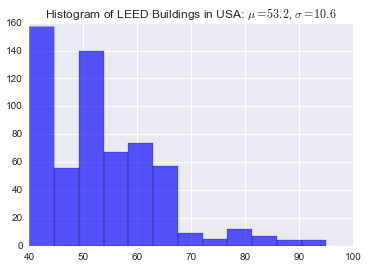

In [131]:
mu = usa_private.PointsAchieved.mean() # mean of distribution
sigma = usa_private.PointsAchieved.std() # standard deviation of distribution
x = usa_private.PointsAchieved.tolist()

num_bins = 12
# the histogram of the data
n, bins, patches = plt.hist(x, num_bins, facecolor='blue', alpha=0.65)
# add a 'best fit' line
# y = mlab.normpdf(bins, mu, sigma)
# plt.plot(bins, y, 'r--')
# plt.xlabel('Points Achieved')
# plt.ylabel('Probability')
plt.title(r'Histogram of LEED Buildings in USA: $\mu=53.2$, $\sigma=10.6$')

# Tweak spacing to prevent clipping of ylabel
plt.subplots_adjust(left=0.15)
plt.show()

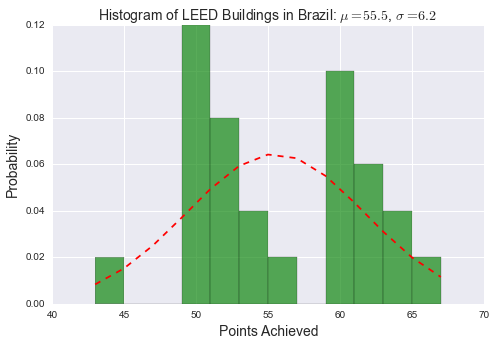

In [52]:
import matplotlib.mlab as mlab

mu = brazil_private.PointsAchieved.mean() # mean of distribution
sigma = brazil_private.PointsAchieved.std() # standard deviation of distribution
x = brazil_private.PointsAchieved.tolist()

fig = plt.figure(figsize=(8, 5), dpi=500)
num_bins = 12
# the histogram of the data
n, bins, patches = plt.hist(x, num_bins, normed=1, facecolor='green', alpha=0.65)
# add a 'best fit' line
y = mlab.normpdf(bins, mu, sigma)
plt.plot(bins, y, 'r--')
plt.xlabel('Points Achieved', fontsize=14)
plt.ylabel('Probability', fontsize=14)
plt.title(r'Histogram of LEED Buildings in Brazil: $\mu=55.5$, $\sigma=6.2$', fontsize=14)

# Tweak spacing to prevent clipping of ylabel
plt.subplots_adjust(left=0.15)
plt.savefig('brazil_private.png')
plt.show()

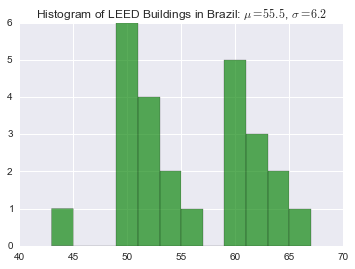

In [123]:
mu = brazil_private.PointsAchieved.mean() # mean of distribution
sigma = brazil_private.PointsAchieved.std() # standard deviation of distribution
x = brazil_private.PointsAchieved.tolist()

num_bins = 12
# the histogram of the data
n, bins, patches = plt.hist(x, num_bins, facecolor='green', alpha=0.65)
# add a 'best fit' line
# y = mlab.normpdf(bins, mu, sigma)
# plt.plot(bins, y, 'r--')
# plt.xlabel('Points Achieved')
# plt.ylabel('Probability')
plt.title(r'Histogram of LEED Buildings in Brazil: $\mu=55.5$, $\sigma=6.2$')

# Tweak spacing to prevent clipping of ylabel
plt.subplots_adjust(left=0.15)
plt.show()